In [22]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from pandas import plotting
import numpy as np

# Read data

In [36]:
train_data = pd.read_csv('../datasets/original/train.csv', sep=',', na_values="NA")
test_data = pd.read_csv('../datasets/original/test.csv', sep=',', na_values="NA")
data = pd.concat([train_data, test_data],sort=False)

In [24]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [25]:
data.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 81 entries, Id to SalePrice
dtypes: float64(12), int64(26), object(43)
memory usage: 1.8+ MB


In [26]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Features preprocessing

In [27]:
data[data.columns[data.isna().any()]].isna().sum()

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

## MSSubClass

Identifies the type of dwelling involved in the sale.<br>
Type: Categorical

Check nulls

In [28]:
data['MSSubClass'].isna().sum()

0

In [29]:
data['MSSubClass'].describe()

count    2919.000000
mean       57.137718
std        42.517628
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

We change it to categorical

In [30]:
data.loc[data.MSSubClass == 20, 'MSSubClass'] = 'A'
data.loc[data.MSSubClass == 30, 'MSSubClass'] = 'B'
data.loc[data.MSSubClass == 40, 'MSSubClass'] = 'C'
data.loc[data.MSSubClass == 45, 'MSSubClass'] = 'D'
data.loc[data.MSSubClass == 50, 'MSSubClass'] = 'E'
data.loc[data.MSSubClass == 60, 'MSSubClass'] = 'F'
data.loc[data.MSSubClass == 70, 'MSSubClass'] = 'G'
data.loc[data.MSSubClass == 75, 'MSSubClass'] = 'H'
data.loc[data.MSSubClass == 80, 'MSSubClass'] = 'I'
data.loc[data.MSSubClass == 85, 'MSSubClass'] = 'J'
data.loc[data.MSSubClass == 90, 'MSSubClass'] = 'K'
data.loc[data.MSSubClass == 120, 'MSSubClass'] = 'L'
data.loc[data.MSSubClass == 150, 'MSSubClass'] = 'M'
data.loc[data.MSSubClass == 160, 'MSSubClass'] = 'N'
data.loc[data.MSSubClass == 180, 'MSSubClass'] = 'O'
data.loc[data.MSSubClass == 190, 'MSSubClass'] = 'P'

In [31]:
data['MSSubClass'].value_counts()

A    1079
F     575
E     287
L     182
B     139
N     128
G     128
I     118
K     109
P      61
J      48
H      23
D      18
O      17
C       6
M       1
Name: MSSubClass, dtype: int64

## MSZoning

Identifies the general zoning classification of the sale.<br>
Type: Categorical

Check nulls

In [37]:
data['MSZoning'].isna().sum()

4

There is a very low number of nulls so we substitue them by the median.

In [41]:
data['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [43]:
median = 'RL'
data.loc[data.MSZoning.isna(), 'MSZoning'] = median
data['MSZoning'].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

## LotFrontage

Linear feet of street connected to property. <br>
Type: Numeric

Check nulls

In [44]:
data['LotFrontage'].isna().sum()

486

There are too many nulls so we delete the column.

In [47]:
data.drop(columns=['LotFrontage'],inplace=True)

## LotArea

Lot size in square feet. <br>
Type: Numeric

Check nulls

In [48]:
data['LotArea'].isna().sum()

0

Check outliers

In [57]:
outliers = data[data.LotArea>data.LotArea.mean()+2*data.LotArea.std()]
len(outliers)

43

We substitute them for the median

In [58]:
median = data['LotArea'].median()
data.loc[data.LotArea>data.LotArea.mean()+2*data.LotArea.std(), 'LotArea'] = median

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf8632790>]],
      dtype=object)

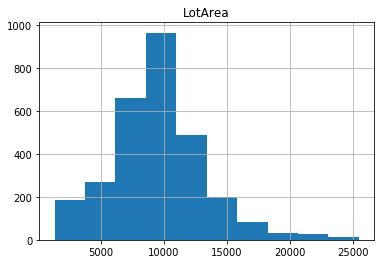

In [59]:
data.hist(column=['LotArea'])

## Street